In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import shapiro, kstest, zscore
import pingouin as pg

In [72]:
df_irrigation = pd.read_csv("dados_de_irrigacao.csv")

In [73]:
df_irrigation.head(5)

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333


In [74]:
df_irrigation.tail(5)

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
294,295,29500,19666.666667
295,296,29600,19733.333333
296,297,29700,19800.000000
297,298,29800,19866.666667
298,299,29900,19933.333333


In [75]:
df_irrigation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Horas de Irrigação        299 non-null    int64  
 1   Área Irrigada             299 non-null    int64  
 2   Área Irrigada por Ângulo  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


In [76]:
df_irrigation.describe()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


<Axes: xlabel='Horas de Irrigação', ylabel='Área Irrigada por Ângulo'>

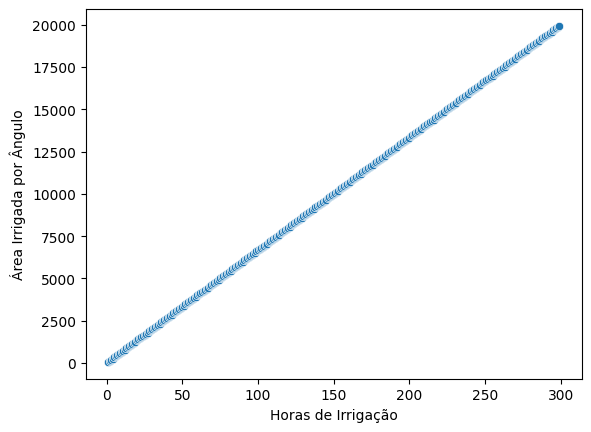

In [77]:
sns.scatterplot(x=df_irrigation['Horas de Irrigação'], y=df_irrigation['Área Irrigada por Ângulo'])

In [78]:
df_irrigation['Horas de Irrigação'].corr(df_irrigation['Área Irrigada por Ângulo'], method='pearson')

np.float64(1.0)

<Axes: >

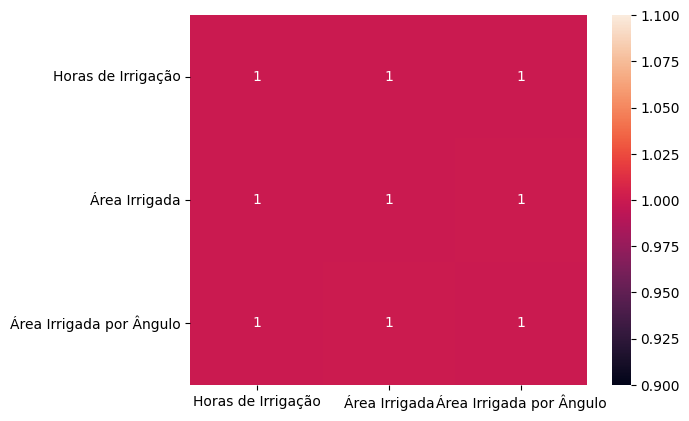

In [79]:
coef_corr_pearson = df_irrigation.corr(method='pearson')
sns.heatmap(coef_corr_pearson, annot=True)

In [80]:
df_irrigation['Horas de Irrigação'].corr(df_irrigation['Área Irrigada por Ângulo'], method='spearman')

np.float64(1.0)

<Axes: >

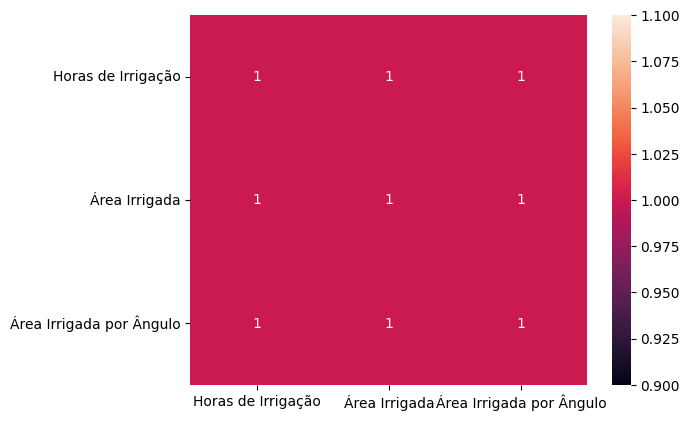

In [81]:
coef_corr_pearson = df_irrigation.corr(method='spearman')
sns.heatmap(coef_corr_pearson, annot=True)

In [82]:
X = df_irrigation['Horas de Irrigação'].values.reshape(-1, 1)
y = df_irrigation['Área Irrigada por Ângulo'].values.reshape(-1, 1)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [84]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [85]:
coef = model.coef_
intercept = model.intercept_

print(f"Equação da reta: y = {coef[0][0]}x + ({intercept[0]})")

Equação da reta: y = 66.66666666666669x + (-3.637978807091713e-12)


In [86]:
y_pred = model.predict(X_test)

In [87]:
mean_absolute_error(y_test, y_pred)

1.846305824276189e-12

In [88]:
mean_squared_error(y_test, y_pred)

6.205301890955153e-24

<Axes: >

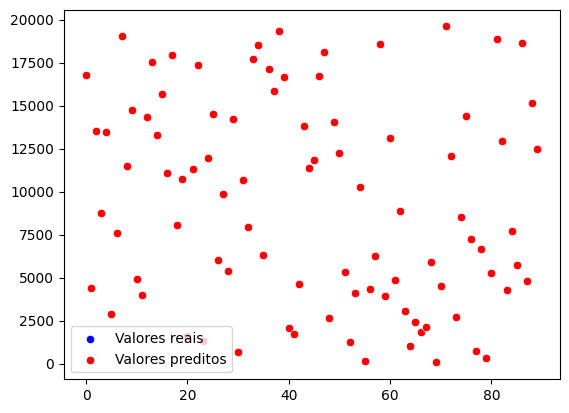

In [89]:
x_axis = range(len(y_test))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color="blue", label="Valores reais")
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color="red", label="Valores preditos")

In [90]:
waste = y_test - y_pred
waste_std = zscore(waste)

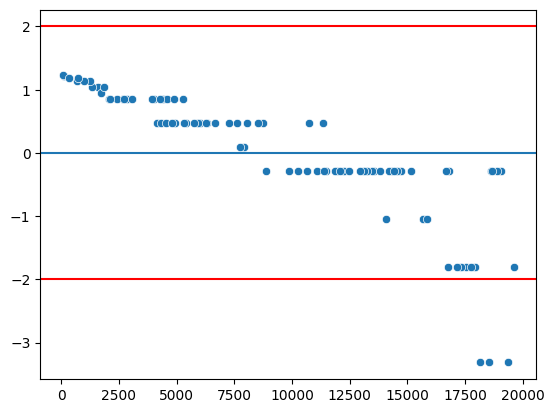

In [91]:
sns.scatterplot(x=y_pred.reshape(-1), y=waste_std.reshape(-1))
plt.axhline(y=0)
plt.axhline(y=-2, color="red")
plt.axhline(y=2, color="red")

**Linearidade e homocedasticidade**

*   Os resíduos estão concentrados entre [-2, +2] na escala padrão indicando linearidade no modelo.
*   Os valores estão em torno da reta indicando homocedasticidade das variâncias dos resíduos.

Text(0, 0.5, 'Resíduos na Escala Padrão')

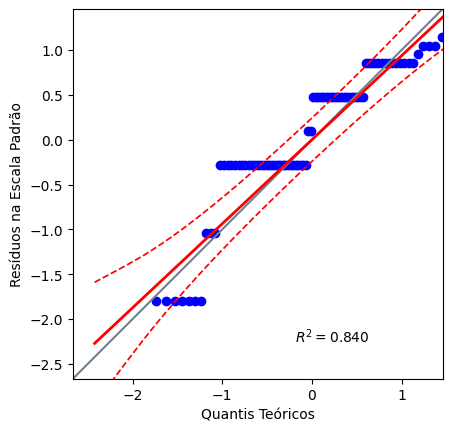

In [92]:
pg.qqplot(waste_std, dist="norm", confidence=0.95)
plt.xlabel("Quantis Teóricos")
plt.ylabel("Resíduos na Escala Padrão")

In [93]:
stat_shapiro, p_value_shapiro = shapiro(waste_std.reshape(-1))
print(f"Estatística do teste: {stat_shapiro} e p-value: {p_value_shapiro}")
print("p-value < 0.05: {}".format('Sim' if p_value_shapiro < 0.05 else 'Não'))

Estatística do teste: 0.8399351034128089 e p-value: 1.8971821592926317e-08
p-value < 0.05: Sim


In [94]:
stat_kstest, p_value_kstest = kstest(waste_std.reshape(-1), "norm")
print(f"Estatística do teste: {stat_kstest} e p-value: {p_value_kstest}")
print("p-value < 0.05: {}".format('Sim' if p_value_kstest < 0.05 else 'Não'))

Estatística do teste: 0.24487890678876695 e p-value: 3.080454380557515e-05
p-value < 0.05: Sim


In [96]:
irrigated_area = model.predict([[15]])
print(f"Estimativa da área irrigada para 15 horas de irrigação: {irrigated_area[0][0]}")

Estimativa da área irrigada para 15 horas de irrigação: 999.9999999999966
